In [73]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
x = iris.data
y = iris.target
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [74]:
df_original = pd.DataFrame(x)
df_2feature = df_original.iloc[: , :-2]
df_2feature[2]  = y
print(df_2feature,df_2feature[2].value_counts())

       0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  2
146  6.3  2.5  2
147  6.5  3.0  2
148  6.2  3.4  2
149  5.9  3.0  2

[150 rows x 3 columns] 0    50
1    50
2    50
Name: 2, dtype: int64


In [75]:
df_2feature = df_2feature.iloc[:-50,:]
df_2feature.columns = ['x1','x2','y']
#df_2feature.loc[df_2feature.y==2,'y']=1
print(df_2feature['y'].value_counts(),df_2feature)

0    50
1    50
Name: y, dtype: int64      x1   x2  y
0   5.1  3.5  0
1   4.9  3.0  0
2   4.7  3.2  0
3   4.6  3.1  0
4   5.0  3.6  0
..  ...  ... ..
95  5.7  3.0  1
96  5.7  2.9  1
97  6.2  2.9  1
98  5.1  2.5  1
99  5.7  2.8  1

[100 rows x 3 columns]


In [76]:
subset = df_2feature.sample(frac=0.2,replace=False,random_state=43)
df_2feature = df_2feature.append(subset)
print(df_2feature.info())
df_2feature = df_2feature.drop_duplicates(subset=['x1','x2','y'],keep=False)
print(df_2feature.info(),subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      120 non-null    float64
 1   x2      120 non-null    float64
 2   y       120 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 3 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      54 non-null     float64
 1   x2      54 non-null     float64
 2   y       54 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 20 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      20 non-null     float64
 1   x2      20 non-null     float64
 2   y       20 non-null     int64  
dtypes: float64(2), int64(1)
mem

In [77]:
df_x1 = df_2feature.drop(columns=['x2'])
df_x2 = df_2feature.drop(columns=['x1'])


In [78]:
x_original = df_x1.iloc[:,:-1].values
y_original = df_x1.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto',probability=True)
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)

result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy with only x1 be trained(on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))

Original Accuracy with only x1 be trained(on training) = 0.813953488372093
Original Accuracy (on testing) = 0.7272727272727273


In [79]:
test_x = subset.iloc[:,:-2].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))

Original Accuracy (on testing) = 0.8


In [80]:
x_original = df_x2.iloc[:,:-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto',probability=True)
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)

result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy with only x2 be trained (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))

Original Accuracy with only x2 be trained (on training) = 0.813953488372093
Original Accuracy (on testing) = 0.9090909090909091


In [81]:
test_x = subset.drop(columns=['x1','y'])
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))

Original Accuracy (on testing) = 0.7


In [82]:
x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto',probability=True)
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)

result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy with  x1,x2 be trained(on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))

test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))

Original Accuracy with  x1,x2 be trained(on training) = 1.0
Original Accuracy (on testing) = 0.9090909090909091
Original Accuracy (on testing) = 1.0


In [83]:
t = clf_original.decision_function(X_train)
t = pd.DataFrame(t)
x_original = pd.DataFrame(X_train)

x_original = pd.concat([x_original,t],axis=1)
x_original.columns = ['x1','x2','score']
x_original


,x1,x2,score
0,4.4,2.9,-1.296714
1,4.6,3.2,-1.594783
2,5.6,2.7,1.169694
3,6.3,2.5,2.785716
4,6.8,2.8,2.997878
5,7.0,3.2,2.487068
6,6.2,2.9,1.764674
7,6.6,3.0,2.232242
8,6.1,2.9,1.594597
9,6.9,3.1,2.529732


In [84]:
import seaborn as sns

def test(df):
    dfData = df.corr()
    plt.subplots(figsize=(9, 9)) # 設定畫面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    plt.savefig('./BluesStateRelation.png')
    plt.show()

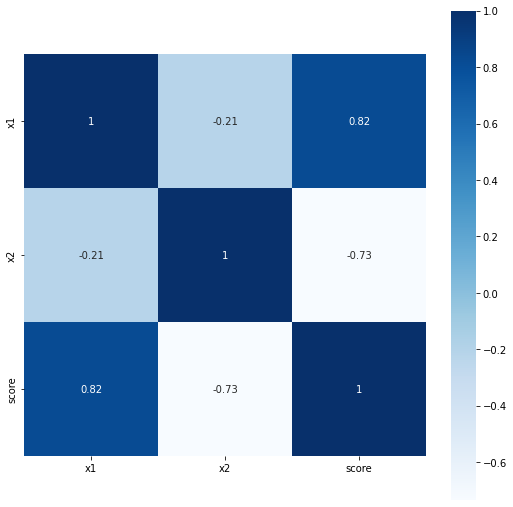

In [85]:
test(x_original)